## Data Visualization 

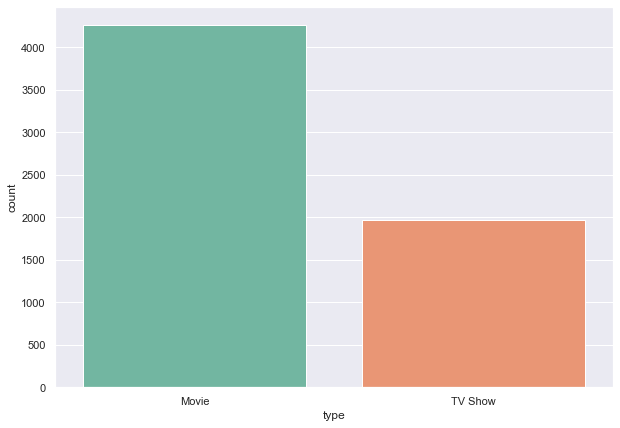

In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('netflix_titles.csv')

plt.figure(figsize=(10,7))
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, palette="Set2")

In [2]:
print(df.isna().sum())

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


In [5]:
import itertools
country = [x.split(', ') for x in df.dropna(subset = ['country'])['country'].to_list()]
country




[['United States', 'India', 'South Korea', 'China'],
 ['United Kingdom'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['Spain'],
 ['Bulgaria', 'United States', 'Spain', 'Canada'],
 ['Chile'],
 ['United States'],
 ['United States', 'United Kingdom', 'Denmark', 'Sweden'],
 ['Netherlands', 'Belgium', 'United Kingdom', 'United States'],
 ['France', 'Belgium'],
 ['United States'],
 ['France', 'Belgium'],
 ['United States', 'Uruguay'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States,'],
 ['Thailand'],
 ['China', 'Canada', 'United States'],
 ['United States'],
 ['Belgium', 'United Kingdom', 'United States'],
 ['Belgium', 'France'],
 ['India'],
 ['India'],
 ['France'],
 ['United States'],
 ['India'],
 ['United Kingdom'],
 ['United Kingdom'],
 ['United States', 'Canada'],
 ['Thailand'],
 ['Thailand'],
 ['Thailand'],
 ['Thailand'],
 ['Thailand'],
 ['Thailand'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['Pakistan'],
 ['Canada'],
 [

In [6]:
list_country = list(itertools.chain(*country))
list_country

['United States',
 'India',
 'South Korea',
 'China',
 'United Kingdom',
 'United States',
 'United States',
 'United States',
 'Spain',
 'Bulgaria',
 'United States',
 'Spain',
 'Canada',
 'Chile',
 'United States',
 'United States',
 'United Kingdom',
 'Denmark',
 'Sweden',
 'Netherlands',
 'Belgium',
 'United Kingdom',
 'United States',
 'France',
 'Belgium',
 'United States',
 'France',
 'Belgium',
 'United States',
 'Uruguay',
 'United States',
 'United States',
 'United States',
 'United States,',
 'Thailand',
 'China',
 'Canada',
 'United States',
 'United States',
 'Belgium',
 'United Kingdom',
 'United States',
 'Belgium',
 'France',
 'India',
 'India',
 'France',
 'United States',
 'India',
 'United Kingdom',
 'United Kingdom',
 'United States',
 'Canada',
 'Thailand',
 'Thailand',
 'Thailand',
 'Thailand',
 'Thailand',
 'Thailand',
 'United States',
 'United States',
 'United States',
 'Pakistan',
 'Canada',
 'United States',
 'India',
 'United States',
 'United Kingdom',
 '

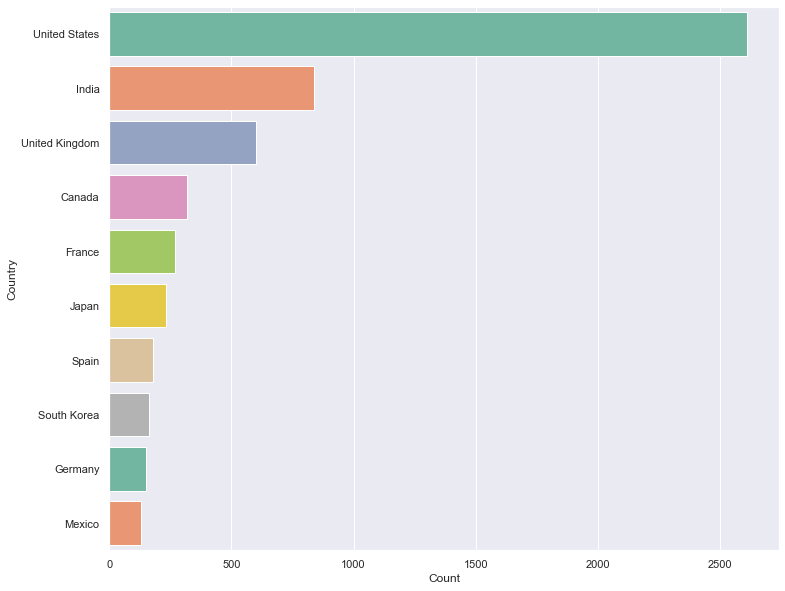

In [9]:
from collections import Counter
df_netflix_country_count = pd.DataFrame(Counter(list_country).most_common()[:10],columns = ['Country','Count'])


plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.barplot(y="Country", x='Count', data=df_netflix_country_count, palette="Set2", orient='h')



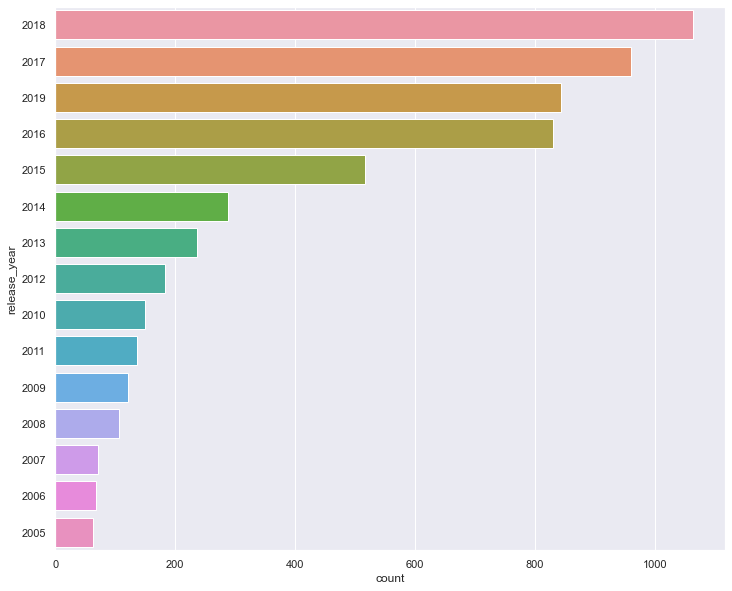

In [10]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y='release_year', data=df, order=df['release_year'].value_counts().index[0:15])

## Data Preprocessing

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [15]:
df =  df.drop(['type' , 'director' , 'country' , 'date_added','release_year','rating','duration'],axis = 1)
df.isna().sum()

show_id          0
title            0
cast           570
listed_in        0
description      0
dtype: int64

In [16]:
df.dropna(inplace = True)

In [18]:
import nltk
from nltk.tokenize import word_tokenize

col_name = ['cast','listed_in','description']
for i in col_name:
    df[i] = df[i].str.lower()
    df[i] = df[i].apply(word_tokenize)    
df.head()


,show_id,title,cast,listed_in,description
0,81145628,Norm of the North: King Sized Adventure,"[alan, marriott, ,, andrew, toth, ,, brian, do...","[children, &, family, movies, ,, comedies]","[before, planning, an, awesome, wedding, for, ..."
1,80117401,Jandino: Whatever it Takes,"[jandino, asporaat]","[stand-up, comedy]","[jandino, asporaat, riffs, on, the, challenges..."
2,70234439,Transformers Prime,"[peter, cullen, ,, sumalee, montano, ,, frank,...","[kids, ', tv]","[with, the, help, of, three, human, allies, ,,..."
3,80058654,Transformers: Robots in Disguise,"[will, friedle, ,, darren, criss, ,, constance...","[kids, ', tv]","[when, a, prison, ship, crash, unleashes, hund..."
4,80125979,#realityhigh,"[nesta, cooper, ,, kate, walsh, ,, john, micha...",[comedies],"[when, nerdy, high, schooler, dani, finally, a..."


In [19]:
from nltk.corpus import stopwords
from string import punctuation

list_stopword = set(stopwords.words('english') + list(punctuation))
for i in col_name:
    df[i] = df[i].apply(lambda x: [word for word in x if word not in list_stopword]) 
    
df.head()
    

,show_id,title,cast,listed_in,description
0,81145628,Norm of the North: King Sized Adventure,"[alan, marriott, andrew, toth, brian, dobson, ...","[children, family, movies, comedies]","[planning, awesome, wedding, grandfather, pola..."
1,80117401,Jandino: Whatever it Takes,"[jandino, asporaat]","[stand-up, comedy]","[jandino, asporaat, riffs, challenges, raising..."
2,70234439,Transformers Prime,"[peter, cullen, sumalee, montano, frank, welke...","[kids, tv]","[help, three, human, allies, autobots, protect..."
3,80058654,Transformers: Robots in Disguise,"[friedle, darren, criss, constance, zimmer, kh...","[kids, tv]","[prison, ship, crash, unleashes, hundreds, dec..."
4,80125979,#realityhigh,"[nesta, cooper, kate, walsh, john, michael, hi...",[comedies],"[nerdy, high, schooler, dani, finally, attract..."


In [20]:
import string

df['description'] = df['description'].apply(lambda x: [word.translate(str.maketrans('','',string.punctuation)) for word in x])
df['description'] = df['description'].apply(lambda x:[word for word in x if len(word)>0])

df.head()

,show_id,title,cast,listed_in,description
0,81145628,Norm of the North: King Sized Adventure,"[alan, marriott, andrew, toth, brian, dobson, ...","[children, family, movies, comedies]","[planning, awesome, wedding, grandfather, pola..."
1,80117401,Jandino: Whatever it Takes,"[jandino, asporaat]","[stand-up, comedy]","[jandino, asporaat, riffs, challenges, raising..."
2,70234439,Transformers Prime,"[peter, cullen, sumalee, montano, frank, welke...","[kids, tv]","[help, three, human, allies, autobots, protect..."
3,80058654,Transformers: Robots in Disguise,"[friedle, darren, criss, constance, zimmer, kh...","[kids, tv]","[prison, ship, crash, unleashes, hundreds, dec..."
4,80125979,#realityhigh,"[nesta, cooper, kate, walsh, john, michael, hi...",[comedies],"[nerdy, high, schooler, dani, finally, attract..."


In [22]:
type(df.description)

pandas.core.series.Series

In [23]:
for i in col_name:
    df[i] = df[i].apply(lambda x: list(set(x)))
    
type(df.description)

pandas.core.series.Series

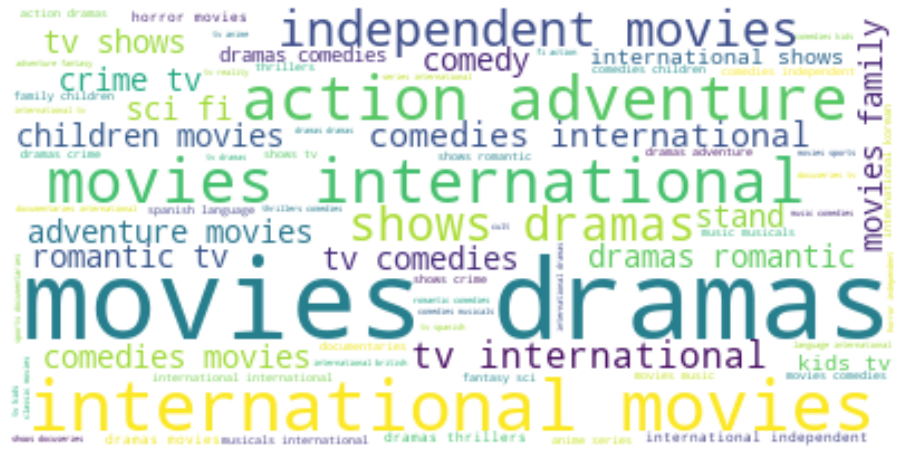

In [25]:
from wordcloud import WordCloud

geners = df['listed_in'].tolist()
list_genre = list(itertools.chain(*geners))
genre = ' '.join(list_genre)
plt.figure(figsize=(16,12))
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(genre)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

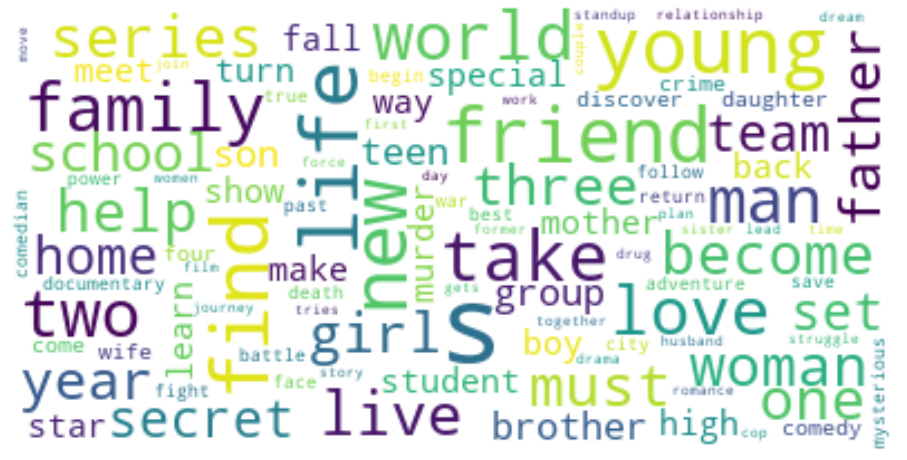

In [28]:
description = df['description'].tolist()
list_desc = list(itertools.chain(*description))
description = ' '.join(list_desc)
plt.figure(figsize=(16,12))
wordcloud = WordCloud(max_font_size = 50,max_words=100,background_color="white").generate(description)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [29]:
df['tag'] = df['cast'] + df['listed_in'] + df['description']
df.drop(['cast' , 'listed_in','description'],axis = 1 , inplace = True)
df.head()

,show_id,title,tag
0,81145628,Norm of the North: King Sized Adventure,"[brian, toth, cameron, dobson, durupt, alan, m..."
1,80117401,Jandino: Whatever it Takes,"[asporaat, jandino, stand-up, comedy, raising,..."
2,70234439,Transformers Prime,"[peter, blum, sumalee, friedle, cullen, michae..."
3,80058654,Transformers: Robots in Disguise,"[ted, khary, friedle, peter, payton, zimmer, m..."
4,80125979,#realityhigh,"[peter, alicia, graf, john, cooper, keith, reb..."


In [30]:
df['tag'] = df['tag'].apply(lambda x: " ".join(x))
df.head()

,show_id,title,tag
0,81145628,Norm of the North: King Sized Adventure,brian toth cameron dobson durupt alan marriott...
1,80117401,Jandino: Whatever it Takes,asporaat jandino stand-up comedy raising riffs...
2,70234439,Transformers Prime,peter blum sumalee friedle cullen michael guna...
3,80058654,Transformers: Robots in Disguise,ted khary friedle peter payton zimmer mitchell...
4,80125979,#realityhigh,peter alicia graf john cooper keith rebekah mi...


In [32]:
df.reset_index()
df.tag[0]

'brian toth cameron dobson durupt alan marriott jonathan michael andrew maya holmes lisa lee kay cole jennifer tockar howard comedies children movies family bear back planning awesome grandfather wedding archaeologist polar evil take stolen first king artifact must'

## Lammetization

In [42]:
df_try = df.copy()
df_try.reset_index(inplace = True)
print(df_try.shape)


from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


for i in range(len(df_try)):
    words = nltk.word_tokenize(df_try.tag[i])
    words = [lemmatizer.lemmatize(word) for word in words]
    df_try['tag'][i] = " ".join(words)
df_try.head()

(5664, 4)


C:\Users\HARSH PATEL\AppData\Local\Temp\ipykernel_16312\2128310482.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_try['tag'][i] = " ".join(words)


,index,show_id,title,tag
0,0,81145628,Norm of the North: King Sized Adventure,brian toth cameron dobson durupt alan marriott...
1,1,80117401,Jandino: Whatever it Takes,asporaat jandino stand-up comedy raising riff ...
2,2,70234439,Transformers Prime,peter blum sumalee friedle cullen michael guna...
3,3,80058654,Transformers: Robots in Disguise,ted khary friedle peter payton zimmer mitchell...
4,4,80125979,#realityhigh,peter alicia graf john cooper keith rebekah mi...


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
df_try.tag[0]

'brian toth cameron dobson durupt alan marriott jonathan michael andrew maya holmes lisa lee kay cole jennifer tockar howard comedy child movie family bear back planning awesome grandfather wedding archaeologist polar evil take stolen first king artifact must'

In [47]:
cv = CountVectorizer(max_features = 5000 , stop_words = 'english')
vecs_lam = cv.fit_transform(df_try.tag).toarray()

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
cred_lam = cosine_similarity(vecs_lam)

In [55]:
df_try.drop('index',axis = 1, inplace = True)

In [56]:
df_try.head(10)

,show_id,title,tag
0,81145628,Norm of the North: King Sized Adventure,brian toth cameron dobson durupt alan marriott...
1,80117401,Jandino: Whatever it Takes,asporaat jandino stand-up comedy raising riff ...
2,70234439,Transformers Prime,peter blum sumalee friedle cullen michael guna...
3,80058654,Transformers: Robots in Disguise,ted khary friedle peter payton zimmer mitchell...
4,80125979,#realityhigh,peter alicia graf john cooper keith rebekah mi...
5,80163890,Apaches,lucía claudia jiménez ammann verónica echegui ...
6,70304989,Automata,ryall banderas mcinnerny dylan antonio christa...
7,80164077,Fabrizio Copano: Solo pienso en mi,copano fabrizio stand-up comedy group copano l...
8,70304990,Good People,jibson dimsdale michael sam diarmaid franco to...
9,80169755,Joaquín Reyes: Una y no más,joaquín reyes stand-up comedy story royalty jo...


In [79]:
sorted(list(enumerate(cred_lam[df_try[df_try['title']=='Love'].index[0]])) , reverse = True , key = lambda x:x[1])

[(18, 1.0),
 (3364, 0.32539568672798425),
 (972, 0.2564945880212885),
 (4127, 0.2480694691784169),
 (4598, 0.2480694691784169),
 (29, 0.2439750182371333),
 (2727, 0.2439750182371333),
 (3844, 0.2439750182371333),
 (2046, 0.23904572186687872),
 (2486, 0.23904572186687872),
 (4835, 0.23904572186687872),
 (2880, 0.23836564731139806),
 (3352, 0.23836564731139806),
 (2110, 0.23312620206007845),
 (1651, 0.23094010767585027),
 (4287, 0.23094010767585027),
 (4739, 0.23094010767585027),
 (2894, 0.22821773229381923),
 (3096, 0.22821773229381923),
 (2160, 0.22360679774997896),
 (3367, 0.22360679774997896),
 (5041, 0.22360679774997896),
 (3300, 0.21926450482675733),
 (711, 0.21693045781865616),
 (752, 0.21693045781865616),
 (1994, 0.21693045781865616),
 (2197, 0.21693045781865616),
 (2743, 0.21693045781865616),
 (3109, 0.21693045781865616),
 (3617, 0.21693045781865616),
 (753, 0.21128856368212912),
 (1294, 0.21081851067789198),
 (1477, 0.21081851067789198),
 (2309, 0.21081851067789198),
 (2551, 0.

In [81]:
def recommended_lam(text):
    list1 = sorted(list(enumerate(cred_lam[df_try[df_try['title']==text].index[0]])), reverse = True , key = lambda x: x[1])[1:6]
    
    for i in list1:
        print(df_try.iloc[i[0]].title)

In [83]:
recommended_lam('Love Ni Bhavai')

Chadi Jawani Budhe Nu
Love Station
Mission: Destroy Love
Club Friday The Series 8
What the Jatt!!


## Stemming

In [46]:
df_stem = df.copy()
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def lam(text):
    y= []
    for i in text.split():
        y.append(stemmer.stem(i))
    return " ".join(y)
df_stem['tag'] = df_stem['tag'].apply(lam)
df_stem['tag'][0]

'brian toth cameron dobson durupt alan marriott jonathan michael andrew maya holm lisa lee kay cole jennif tockar howard comedi child movi famili bear back plan awesom grandfath wed archaeologist polar evil take stolen first king artifact must'

In [48]:
cv = CountVectorizer(max_features = 5000 , stop_words = 'english')
vecs_stem = cv.fit_transform(df_stem.tag).toarray()

In [50]:
from sklearn.metrics.pairwise import cosine_similarity
cred_stem = cosine_similarity(vecs_stem)

In [65]:


df_stem.drop('index' ,axis = 1,inplace = True)
df_stem

,show_id,title,tag
0,81145628,Norm of the North: King Sized Adventure,brian toth cameron dobson durupt alan marriott...
1,80117401,Jandino: Whatever it Takes,asporaat jandino stand-up comedi rais riff sho...
2,70234439,Transformers Prime,peter blum sumale friedl cullen michael gunadi...
3,80058654,Transformers: Robots in Disguise,ted khari friedl peter payton zimmer mitchel c...
4,80125979,#realityhigh,peter alicia graf john cooper keith rebekah mi...
...,...,...,...
5659,80159925,Kikoriki,igor dmitriev kid tv sometim stori alway solv ...
5660,80000063,Red vs. Blue,cruz burni burn sorola gustavo godwin hullum n...
5661,70286564,Maron,nora brener andi hirsch kindler marc maron zeh...
5662,70281022,A Young Doctor's Notebook and Other Stories,rosi christoph cavaliero adam pepperdin radcli...


In [73]:
sorted(list(enumerate(cred_stem[df_stem[df_stem['title']=='Love'].index[0]])) , reverse = True , key = lambda x:x[1])

[(18, 1.0000000000000002),
 (3364, 0.29277002188455997),
 (4127, 0.24209101306752098),
 (4598, 0.24209101306752098),
 (972, 0.23809523809523814),
 (29, 0.2380952380952381),
 (2046, 0.23328473740792174),
 (2727, 0.23262105259961768),
 (2880, 0.23262105259961768),
 (3844, 0.23262105259961768),
 (3352, 0.22750787759664506),
 (1651, 0.2253744679276044),
 (4287, 0.2253744679276044),
 (3096, 0.21821789023599242),
 (2160, 0.2182178902359924),
 (2486, 0.2182178902359924),
 (2911, 0.2182178902359924),
 (4739, 0.2182178902359924),
 (2110, 0.21398024625545647),
 (2894, 0.21398024625545647),
 (752, 0.21170244960998527),
 (4835, 0.21170244960998527),
 (5041, 0.21170244960998527),
 (136, 0.20998026278290405),
 (3300, 0.20998026278290405),
 (1294, 0.2057377999494559),
 (1994, 0.2057377999494559),
 (2309, 0.2057377999494559),
 (2853, 0.2057377999494559),
 (3367, 0.2057377999494559),
 (3585, 0.2057377999494559),
 (611, 0.20025046972870353),
 (1672, 0.20025046972870353),
 (2197, 0.20025046972870353),
 (

In [82]:
def recommended_stem(text):
    list1 = sorted(list(enumerate(cred_stem[df_stem[df_stem['title']==text].index[0]])), reverse = True , key = lambda x: x[1])[1:6]
    
    for i in list1:
        print(df_stem.iloc[i[0]].title)

In [78]:
recommended_stem('Love Ni Bhavai')

Mission: Destroy Love
Club Friday The Series 8
What the Jatt!!
Romantik Komedi
Chadi Jawani Budhe Nu


## Tf-Idf Vectorizer

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 10000, stop_words = 'english')

df_tfidf = df.copy()
vecs_tfidf = tfidf.fit_transform(df_try.tag).toarray()

In [100]:
from sklearn.metrics.pairwise import cosine_similarity
cred_tfidf = cosine_similarity(vecs_tfidf)

In [101]:
df_try.head()

,show_id,title,tag
0,81145628,Norm of the North: King Sized Adventure,brian toth cameron dobson durupt alan marriott...
1,80117401,Jandino: Whatever it Takes,asporaat jandino stand-up comedy raising riff ...
2,70234439,Transformers Prime,peter blum sumalee friedle cullen michael guna...
3,80058654,Transformers: Robots in Disguise,ted khary friedle peter payton zimmer mitchell...
4,80125979,#realityhigh,peter alicia graf john cooper keith rebekah mi...


In [102]:
def recommended_tfidf_lam(text):
    list1 = sorted(list(enumerate(cred_tfidf[df_try[df_try['title']==text].index[0]])), reverse = True , key = lambda x: x[1])[1:6]
    
    for i in list1:
        print(df_try.iloc[i[0]].title)

In [106]:
recommended_tfidf_lam('Love Ni Bhavai')

Club Friday The Series 8
Club Friday The Series 7
Radio Rebel
Miss Culinary
Guzaarish


## Hashing Vectorizer

In [108]:
from sklearn.feature_extraction.text import HashingVectorizer
hvec = HashingVectorizer( n_features = 10000, stop_words = 'english')
vecs_hash = hvec.fit_transform(df_try.tag).toarray()

cred_hash = cosine_similarity(vecs_hash)

In [111]:
df_try.head()

,show_id,title,tag
0,81145628,Norm of the North: King Sized Adventure,brian toth cameron dobson durupt alan marriott...
1,80117401,Jandino: Whatever it Takes,asporaat jandino stand-up comedy raising riff ...
2,70234439,Transformers Prime,peter blum sumalee friedle cullen michael guna...
3,80058654,Transformers: Robots in Disguise,ted khary friedle peter payton zimmer mitchell...
4,80125979,#realityhigh,peter alicia graf john cooper keith rebekah mi...


In [109]:
def recommended_hashing_lam(text):
    list1 = sorted(list(enumerate(cred_hash[df_try[df_try['title']==text].index[0]])), reverse = True , key = lambda x: x[1])[1:6]
    
    for i in list1:
        print(df_try.iloc[i[0]].title)

In [113]:
recommended_hashing_lam('Love')

Cézanne et moi
Headwinds
The Rehearsal
Cities of Last Things
A Ghost Story


## Euclidian distance Matrix 

In [114]:
from sklearn.metrics.pairwise import euclidean_distances
cred_hash_euc = euclidean_distances(vecs_hash)

In [115]:
def recommended_hashing_lam_euclid(text):
    list1 = sorted(list(enumerate(cred_hash_euc[df_try[df_try['title']==text].index[0]])), reverse = True , key = lambda x: x[1])[1:6]
    
    for i in list1:
        print(df_try.iloc[i[0]].title)

In [122]:
recommended_hashing_lam_euclid('Transformers Prime') ## worst results

Verses of Love
Bad Seeds
Time Trap
SPF-18
Satan & Adam
